## SVMs

In [1]:
%matplotlib inline
from modshogun import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import time

In [2]:
generation1 = datasets.make_classification(n_samples=700, n_features=2,n_classes=2,n_redundant=0,n_informative =2
                                           ,n_clusters_per_class=1)
generation2 = datasets.make_classification(n_samples=5000, n_features=2,n_classes=4,n_redundant=0,n_informative =2,
                                           n_clusters_per_class=1)
generation3 = datasets.make_classification(n_samples=20000, n_features=10,n_classes=10,n_redundant=0,n_informative =5
                                          ,n_clusters_per_class=1)
generation4 = datasets.make_classification(n_samples=20000, n_features=100,n_classes=10,n_redundant=0,n_informative =70)


feats1 = generation1[0]
labels1 = generation1[1]

feats2 = generation2[0]
labels2 = generation2[1]

feats3 = generation3[0]
labels3 = generation3[1]

feats4 = generation4[0]
labels4 = generation4[1]

feats1_train = feats1[:600]
feats1_test = feats1[600:]
labels1_train = labels1[:600]
labels1_test = labels1[600:]

feats2_train = feats2[:4500]
feats2_test = feats2[4500:]
labels2_train = labels2[:4500]
labels2_test = labels2[4500:]

feats3_train = feats3[:19000]
feats3_test = feats3[19000:]
labels3_train = labels3[:19000]
labels3_test = labels3[19000:]

feats4_train = feats4[:19000]
feats4_test = feats4[19000:]
labels4_train = labels4[:19000]
labels4_test = labels4[19000:]

feats1_train_inverted = map(list, zip(*feats1_train))
feats1_test_inverted = map(list, zip(*feats1_test))
feats2_train_inverted = map(list, zip(*feats2_train))
feats2_test_inverted = map(list, zip(*feats2_test))
feats3_train_inverted = map(list, zip(*feats3_train))
feats3_test_inverted = map(list, zip(*feats3_test))
feats4_train_inverted = map(list, zip(*feats4_train))
feats4_test_inverted = map(list, zip(*feats4_test))

shogun_feats1_train = RealFeatures(np.array(feats1_train_inverted))
shogun_feats1_test = RealFeatures(np.array(feats1_test_inverted))
shogun_labels1_train = MulticlassLabels(labels1_train*1.0)
shogun_labels1_test = MulticlassLabels(labels1_test*1.0)
shogun_labels1_train_binary = BinaryLabels(labels1_train*1.0 -1)
shogun_labels1_test_binary = BinaryLabels(labels1_test*1.0 -1)


shogun_feats2_train = RealFeatures(np.array(feats2_train_inverted))
shogun_feats2_test = RealFeatures(np.array(feats2_test_inverted))
shogun_labels2_train = MulticlassLabels(labels2_train*1.0)
shogun_labels2_test = MulticlassLabels(labels2_test*1.0)

shogun_feats3_train = RealFeatures(np.array(feats3_train_inverted))
shogun_feats3_test = RealFeatures(np.array(feats3_test_inverted))
shogun_labels3_train = MulticlassLabels(labels3_train*1.0)
shogun_labels3_test = MulticlassLabels(labels3_test*1.0)

shogun_feats4_train = RealFeatures(np.array(feats4_train_inverted))
shogun_feats4_test = RealFeatures(np.array(feats4_test_inverted))
shogun_labels4_train = MulticlassLabels(labels4_train*1.0)
shogun_labels4_test = MulticlassLabels(labels4_test*1.0)

In [3]:
def plot_binary_data(plot,X_train, y_train):
    """
    This function plots 2D binary data with different colors for different labels.
    """
    plot.xlabel(r"$x$")
    plot.ylabel(r"$y$")
    plot.plot(X_train[0, np.argwhere(y_train == 1)], X_train[1, np.argwhere(y_train == 1)], 'bo')
    plot.plot(X_train[0, np.argwhere(y_train == 0)], X_train[1, np.argwhere(y_train == 0)], 'ro')
    plot.plot(X_train[0, np.argwhere(y_train == 2)], X_train[1, np.argwhere(y_train == 2)], 'go')
    plot.plot(X_train[0, np.argwhere(y_train == 3)], X_train[1, np.argwhere(y_train == 3)], 'yo')
    
def compute_plot_isolines(classifier,features,size=200,fading=True):
    """
    This function computes the classification of points on the grid
    to get the decision boundaries used in plotting
    """
    x1 = np.linspace(-5, 5, size)
    x2 = np.linspace(-5,5, size)

    x, y = np.meshgrid(x1, x2)

    plot_features=RealFeatures(np.array((np.ravel(x), np.ravel(y))))
    
    if fading == True:
        plot_labels = classifier.apply(plot_features).get_values()
    else:
        plot_labels = classifier.apply(plot_features).get_labels()
    z = plot_labels.reshape((size, size))
    return x,y,z

def plot_model(plot,classifier,features,labels,fading=True):
    """
    This function plots an input classification model
    """
    x,y,z = compute_plot_isolines(classifier,features,fading=fading)
    plot.pcolor(x,y,z,cmap='RdBu')
    plot.contour(x, y, z, linewidths=1, colors='black')

def compute_plot_isolines_sk(classifier,features,size=200):
    """
    This function computes the classification of points on the grid
    to get the decision boundaries used in plotting
    """
    x1 = np.linspace(-5,5, size)
    x2 = np.linspace(-5,5, size)

    x, y = np.meshgrid(x1, x2)
    plot_labels = classifier.predict(np.c_[x.ravel(), y.ravel()])
    z = plot_labels.reshape(x.shape)
    return x,y,z

def plot_model_sk(plot,classifier,features,labels,fading=True):
    """
    This function plots an input classification model
    """
    x,y,z = compute_plot_isolines_sk(classifier,features)
    plot.pcolor(x,y,z,cmap='RdBu')
    plot.contour(x, y, z, linewidths=1, colors='black')

### Linear SVM

### First Dataset

In [4]:
c  = 1
epsilon =0.0001

shogun_svm1 = LibLinear(c,shogun_feats1_train,shogun_labels1_train_binary)
shogun_svm1.set_liblinear_solver_type(L2R_L2LOSS_SVC) 
shogun_svm1.set_epsilon(epsilon)
shogun_svm1.train()

print np.sum((shogun_labels1_test_binary.get_labels() == shogun_svm1.apply(shogun_feats1_test).get_labels()))/100.0

from sklearn import svm
sklearn_svm1 = svm.LinearSVC()
sklearn_svm1.fit(feats1_train,labels1_train)

print np.sum(labels1_test == sklearn_svm1.predict(feats1_test))/100.0

0.91
0.91


### Compare Decision Boundaries

/usr/lib/pymodules/python2.7/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


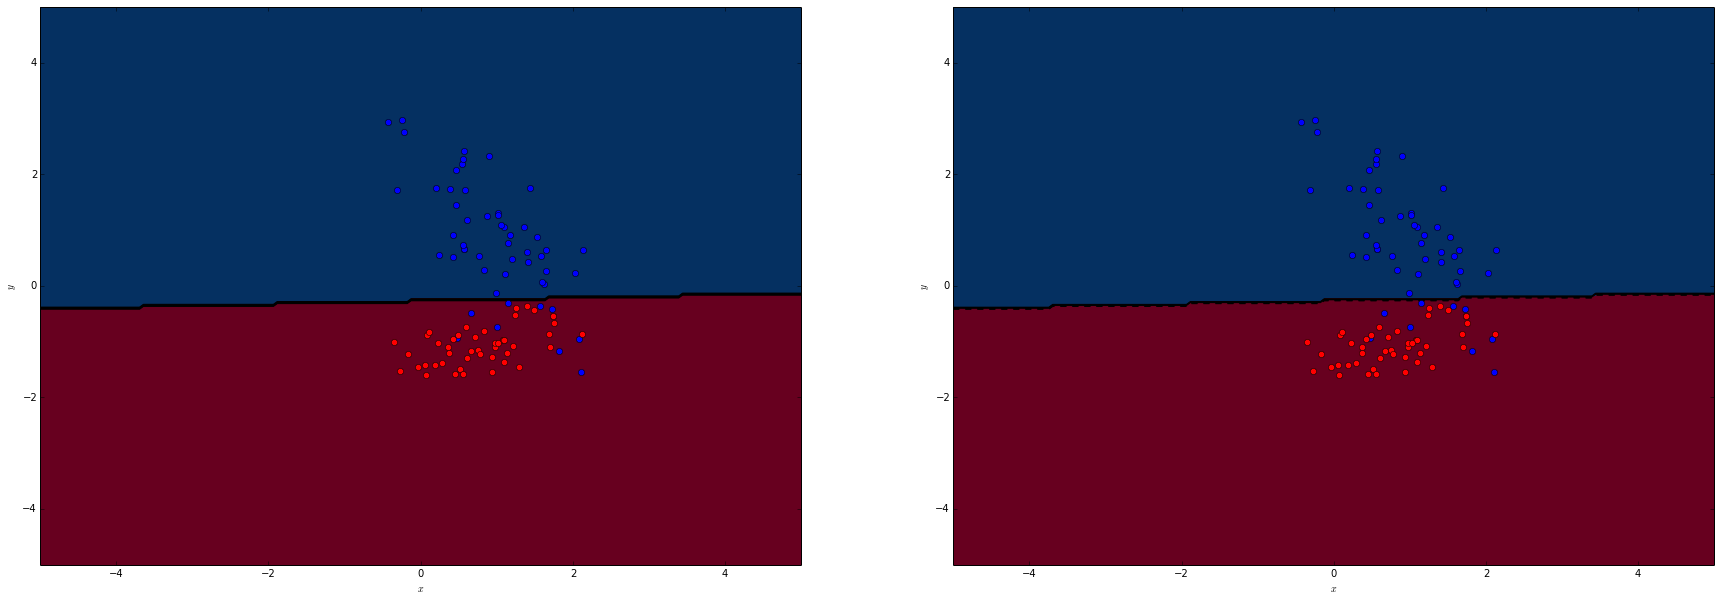

In [5]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_svm1,feats1_train,labels1_train)
plot_binary_data(plt,shogun_feats1_test.get_feature_matrix(),labels1_test)
plt.subplot(122)
plot_model(plt,shogun_svm1,shogun_feats1_train.get_feature_matrix(),labels1_train,fading=False)
plot_binary_data(plt,shogun_feats1_test.get_feature_matrix(),labels1_test)

### Multiclass LibLinear

In [6]:
c  = 1
epsilon =0.0001
shogun_svm11 = MulticlassLibLinear(c,shogun_feats1_train,shogun_labels1_train)
shogun_svm11.set_epsilon(epsilon)
shogun_svm11.train()

print np.sum((shogun_labels1_test.get_labels() == shogun_svm11.apply(shogun_feats1_test).get_labels()))/100.0

from sklearn import svm
sklearn_svm1 = svm.LinearSVC()
sklearn_svm1.fit(feats1_train,labels1_train)

print np.sum(labels1_test == sklearn_svm1.predict(feats1_test))/100.0

0.91
0.91


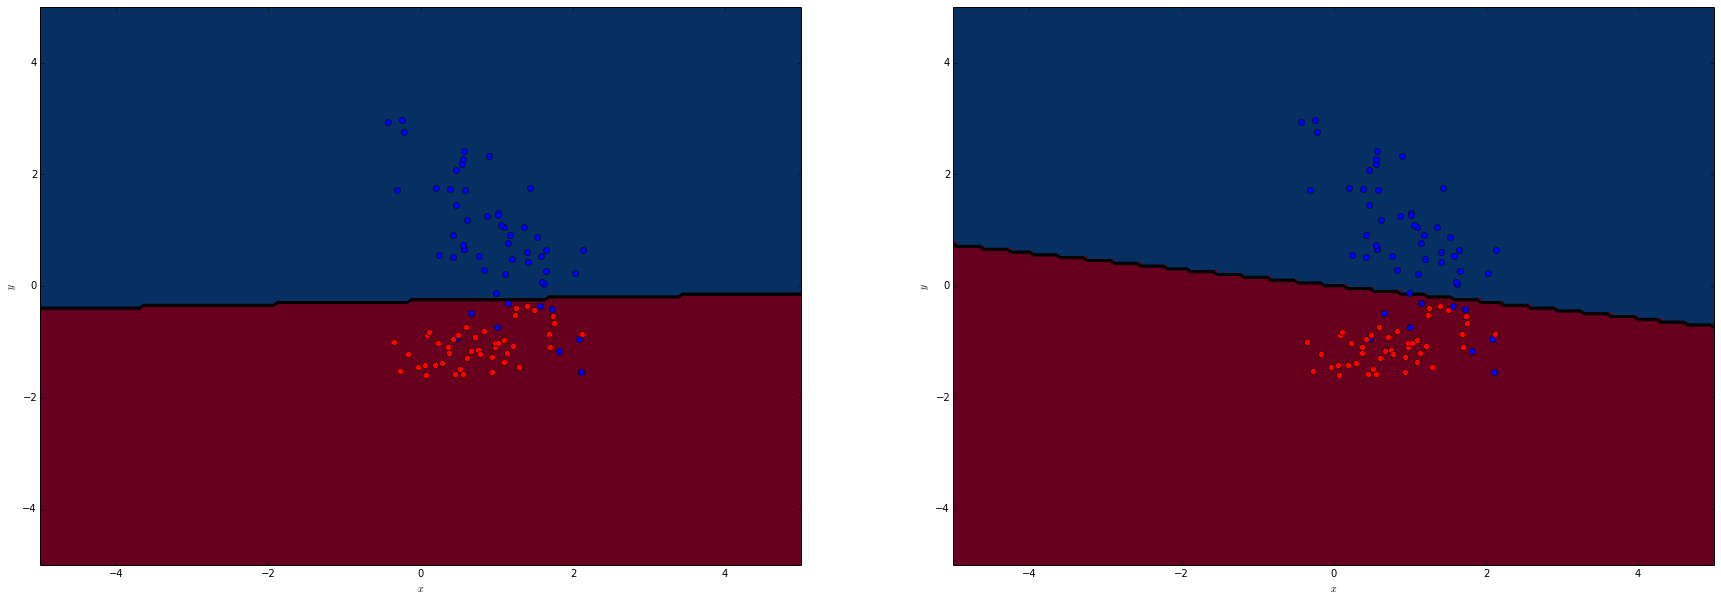

In [7]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_svm1,feats1_train,labels1_train)
plot_binary_data(plt,shogun_feats1_test.get_feature_matrix(),labels1_test)
plt.subplot(122)
plot_model(plt,shogun_svm11,shogun_feats1_train.get_feature_matrix(),labels1_train,fading=False)
plot_binary_data(plt,shogun_feats1_test.get_feature_matrix(),labels1_test)

## 2nd Dataset

In [8]:
c  = 1
epsilon =0.0001
shogun_svm2 = MulticlassLibLinear(c,shogun_feats2_train,shogun_labels2_train)
shogun_svm2.set_epsilon(epsilon)
shogun_svm2.train()

print np.sum((shogun_labels2_test.get_labels() == shogun_svm2.apply(shogun_feats2_test).get_labels()))/500.0

from sklearn import svm
sklearn_svm2 = svm.LinearSVC()
sklearn_svm2.fit(feats2_train,labels2_train)

print np.sum(labels2_test == sklearn_svm2.predict(feats2_test))/500.0

0.784
0.776


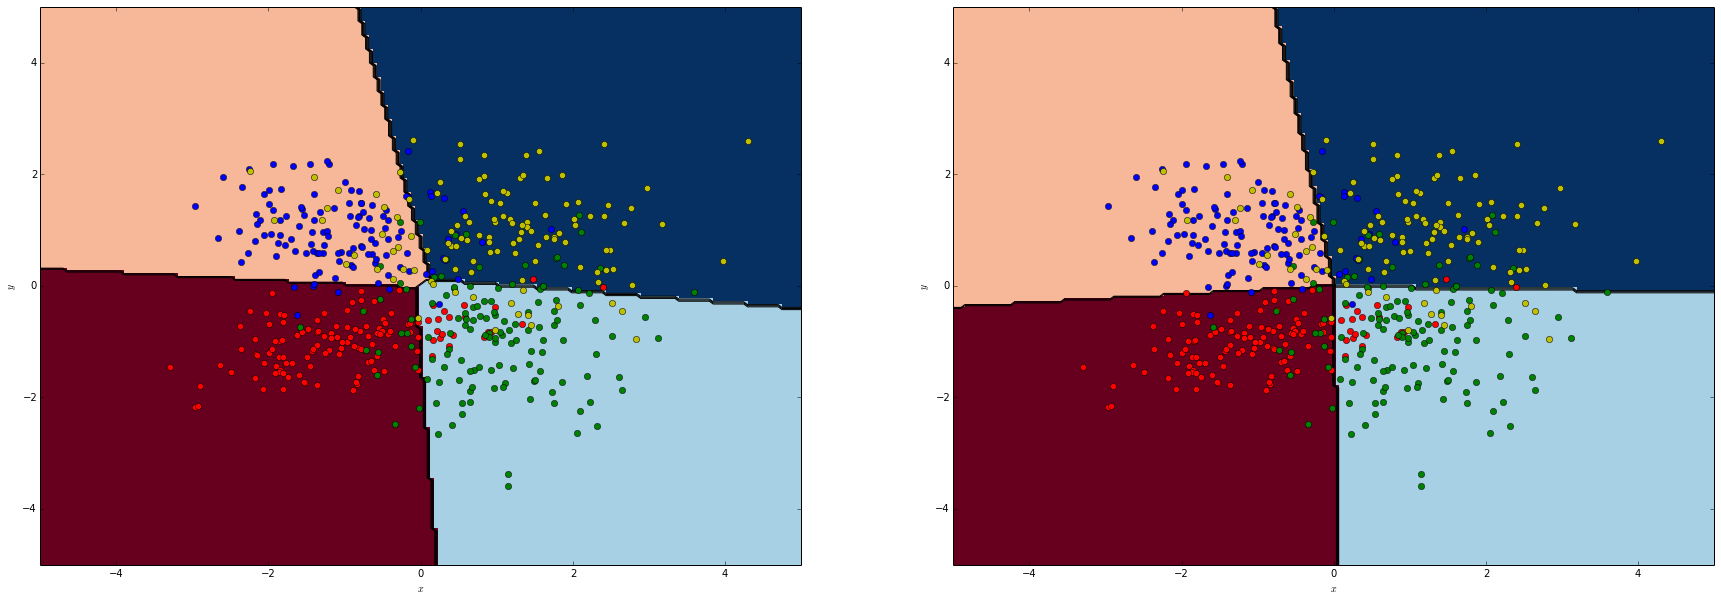

In [9]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_svm2,feats2_train,labels2_train)
plot_binary_data(plt,shogun_feats2_test.get_feature_matrix(),labels2_test)
plt.subplot(122)
plot_model(plt,shogun_svm2,shogun_feats2_train.get_feature_matrix(),labels2_train,fading=False)
plot_binary_data(plt,shogun_feats2_test.get_feature_matrix(),labels2_test)

### Thrid Dataset

In [11]:
c  = 1
epsilon =0.0001
start = time.time()
shogun_svm3 = MulticlassLibLinear(c,shogun_feats3_train,shogun_labels3_train)
shogun_svm3.set_epsilon(epsilon)
shogun_svm3.train()
end = time.time()

print np.sum((shogun_labels3_test.get_labels() == shogun_svm3.apply(shogun_feats3_test).get_labels()))/1000.0
print end - start

from sklearn import svm
start = time.time()
sklearn_svm3 = svm.LinearSVC()
sklearn_svm3.fit(feats3_train,labels3_train)
end = time.time()
print np.sum(labels3_test == sklearn_svm3.predict(feats3_test))/1000.0
print end - start

0.609
2.55700707436
0.602
11.3620681763


### Fourth Dataset

In [10]:
c  = 1
epsilon =0.0001
start = time.time()
shogun_svm4 = MulticlassLibLinear(c,shogun_feats4_train,shogun_labels4_train)
shogun_svm4.set_epsilon(epsilon)
shogun_svm4.train()
end = time.time()
print np.sum((shogun_labels4_test.get_labels() == shogun_svm4.apply(shogun_feats4_test).get_labels()))/1000.0
print end - start

from sklearn import svm
start = time.time()
sklearn_svm4 = svm.LinearSVC()
sklearn_svm4.fit(feats4_train,labels4_train)
end = time.time()

print np.sum(labels4_test == sklearn_svm4.predict(feats4_test))/1000.0
print end-start

0.29
346.710319996
0.289
109.46438694


In [11]:
fr = [80,90,100,130,150,170,200,210]
for i in fr:
    generation = datasets.make_classification(n_samples=10000, n_features=i,n_classes=10,n_redundant=0,n_informative =10
                                              ,n_clusters_per_class=1)
    feats = generation[0]
    labels = generation[1]
    
    feats_train = feats[:9000]
    feats_test = feats[9000:]
    labels_train = labels[:9000]
    labels_test = labels[9000:]
    
    feats_train_inverted = map(list, zip(*feats_train))
    feats_test_inverted = map(list, zip(*feats_test))
    
    shogun_feats_train = RealFeatures(np.array(feats_train_inverted))
    shogun_feats_test = RealFeatures(np.array(feats_test_inverted))
    shogun_labels_train = MulticlassLabels(labels_train*1.0)
    
    print "numebr of features =",i
    c  = 1
    epsilon =0.0001
    start = time.time()
    shogun_svm = MulticlassLibLinear(c,shogun_feats_train,shogun_labels_train)
    shogun_svm.set_epsilon(epsilon)
    shogun_svm.train()
    end = time.time()
    print np.sum((labels_test == shogun_svm.apply(shogun_feats_test).get_labels()))/1000.0
    print end - start

    from sklearn import svm
    start = time.time()
    sklearn_svm = svm.LinearSVC()
    sklearn_svm.fit(feats_train,labels_train)
    end = time.time()

    print np.sum(labels_test == sklearn_svm.predict(feats_test))/1000.0
    print end-start
    print "*****************************************************"

numebr of features = 80
0.64
16.8248221874
0.618
18.0988218784
*****************************************************
numebr of features = 90
0.613
20.3408279419
0.595
26.9533419609
*****************************************************
numebr of features = 100
0.548
25.9420208931
0.544
29.7841768265
*****************************************************
numebr of features = 130
0.593
34.2652208805
0.593
31.1803178787
*****************************************************
numebr of features = 150
0.608
40.7776050568
0.595
32.6390690804
*****************************************************
numebr of features = 170
0.571
56.7839529514
0.558
38.9338021278
*****************************************************
numebr of features = 200
0.546
70.2453830242
0.548
53.832638979
*****************************************************
numebr of features = 210
0.569
87.0939209461
0.568
45.5417671204
*****************************************************


## SVM : Polynomial Kernel

### Dataset 1 

In [13]:
poly_c = 0.5
degree = 4

poly_kernel1 = PolyKernel(shogun_feats1_train, shogun_feats1_train, degree, True)
shogun_poly_svm1 = MulticlassLibSVM(poly_c, poly_kernel1, shogun_labels1_train)
shogun_poly_svm1.train()

print np.sum((labels1_test == shogun_poly_svm1.apply(shogun_feats1_test).get_labels()))/100.0

sklearn_poly_svm1 = svm.SVC(C=poly_c,kernel='poly', degree=degree)
sklearn_poly_svm1.fit(feats1_train,labels1_train)
end = time.time()

print np.sum(labels1_test == sklearn_poly_svm1.predict(feats1_test))/100.0

0.93
0.83


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: [WARN] In file /home/youssef/opensource/shogun/src/shogun/multiclass/MulticlassOneVsOneStrategy.cpp line 34: MulticlassOneVsOneStrategy::CMulticlassOneVsOneStrategy(): register parameters!



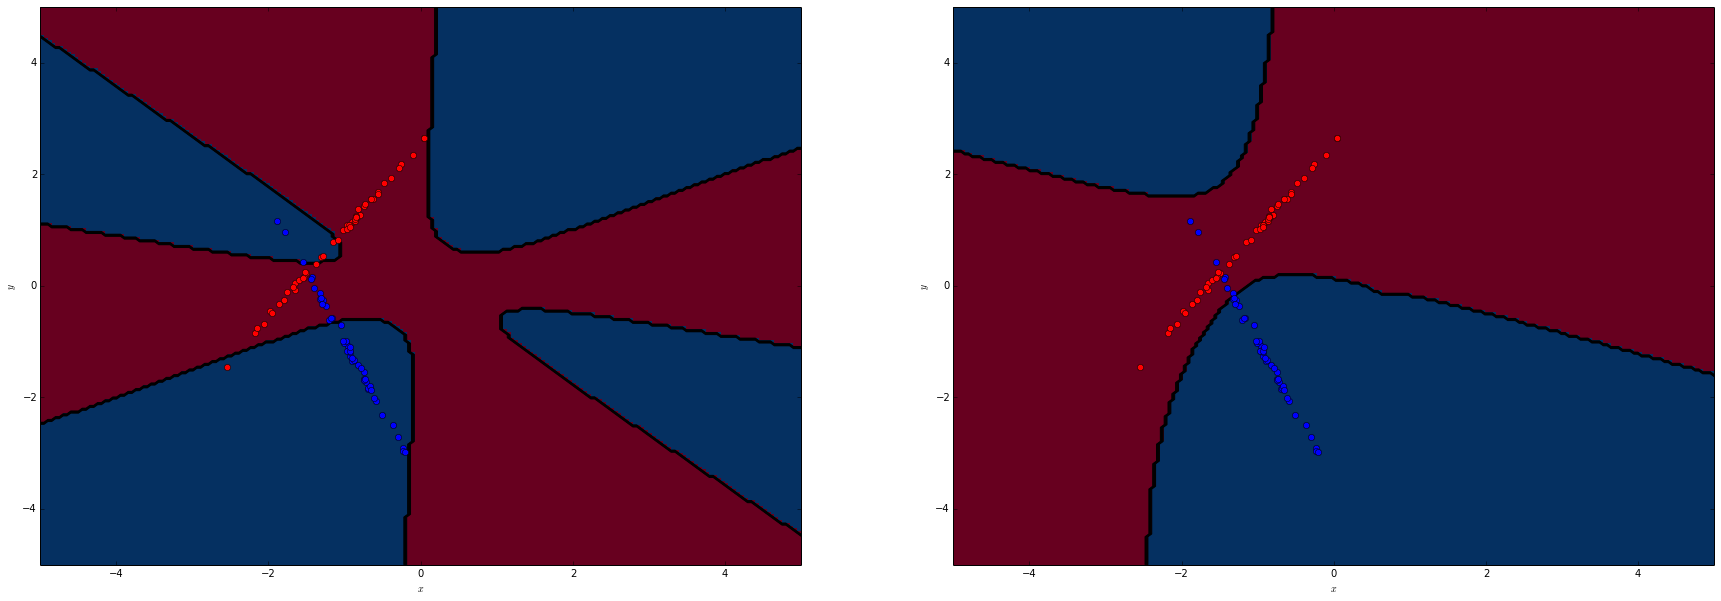

In [14]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_poly_svm1,feats1_train,labels1_train)
plot_binary_data(plt,shogun_feats1_test.get_feature_matrix(),labels1_test)
plt.subplot(122)
plot_model(plt,shogun_poly_svm1,shogun_feats1_train.get_feature_matrix(),labels1_train,fading=False)
plot_binary_data(plt,shogun_feats1_test.get_feature_matrix(),labels1_test)

## Dataset 2

In [15]:
poly_c = 0.5
degree = 4

poly_kernel2 = PolyKernel(shogun_feats2_train, shogun_feats2_train, degree, True)
shogun_poly_svm2 = MulticlassLibSVM(poly_c, poly_kernel2, shogun_labels2_train)
shogun_poly_svm2.train()

print np.sum((labels2_test == shogun_poly_svm2.apply(shogun_feats2_test).get_labels()))/500.0

sklearn_poly_svm2 = svm.SVC(C=poly_c,kernel='poly', degree=degree)
sklearn_poly_svm2.fit(feats2_train,labels2_train)
end = time.time()

print np.sum(labels2_test == sklearn_poly_svm2.predict(feats2_test))/500.0

0.902
0.716


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: [WARN] In file /home/youssef/opensource/shogun/src/shogun/multiclass/MulticlassOneVsOneStrategy.cpp line 34: MulticlassOneVsOneStrategy::CMulticlassOneVsOneStrategy(): register parameters!



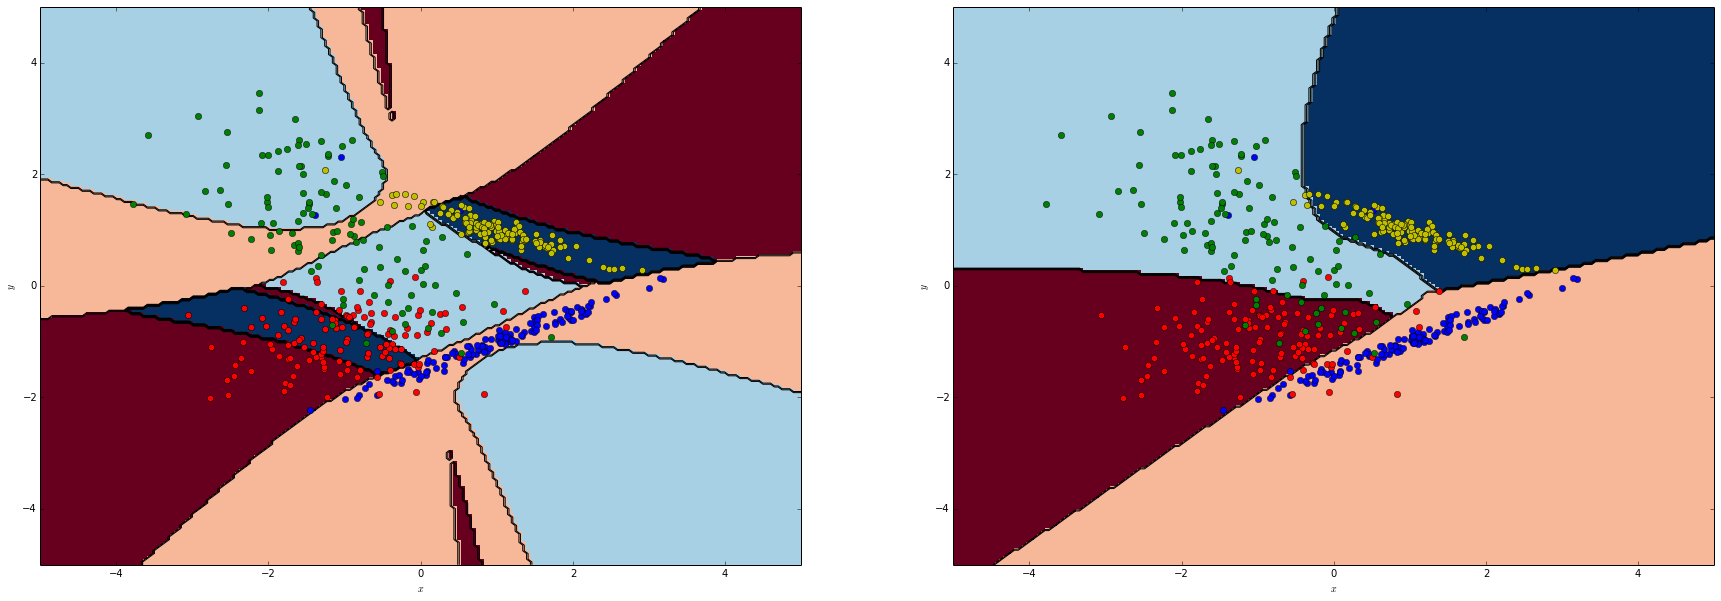

In [16]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_poly_svm2,feats2_train,labels2_train)
plot_binary_data(plt,shogun_feats2_test.get_feature_matrix(),labels2_test)
plt.subplot(122)
plot_model(plt,shogun_poly_svm2,shogun_feats2_train.get_feature_matrix(),labels2_train,fading=False)
plot_binary_data(plt,shogun_feats2_test.get_feature_matrix(),labels2_test)

### Dataset 3

In [17]:
poly_c = 0.5
degree = 4

start = time.time()
poly_kernel3 = PolyKernel(shogun_feats3_train, shogun_feats3_train, degree, True)
shogun_poly_svm3 = MulticlassLibSVM(poly_c, poly_kernel3, shogun_labels3_train)
shogun_poly_svm3.train()
end = time.time()

print np.sum((labels3_test == shogun_poly_svm3.apply(shogun_feats3_test).get_labels()))/1000.0
print end-start

start = time.time()
sklearn_poly_svm3 = svm.SVC(C=poly_c,kernel='poly', degree=degree)
sklearn_poly_svm3.fit(feats3_train,labels3_train)
end = time.time()

print np.sum(labels3_test == sklearn_poly_svm3.predict(feats3_test))/1000.0
print end-start

0.812
9.66766691208
0.697
8.57410597801


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: [WARN] In file /home/youssef/opensource/shogun/src/shogun/multiclass/MulticlassOneVsOneStrategy.cpp line 34: MulticlassOneVsOneStrategy::CMulticlassOneVsOneStrategy(): register parameters!



### Dataset 4

In [18]:
poly_c = 0.5
degree = 4

start = time.time()
poly_kernel4 = PolyKernel(shogun_feats4_train, shogun_feats4_train, degree, True)
shogun_poly_svm4 = MulticlassLibSVM(poly_c, poly_kernel4, shogun_labels4_train)
shogun_poly_svm4.train()
end = time.time()

print np.sum((labels4_test == shogun_poly_svm4.apply(shogun_feats4_test).get_labels()))/1000.0
print end-start

start = time.time()
sklearn_poly_svm4 = svm.SVC(C=poly_c,kernel='poly', degree=degree)
sklearn_poly_svm4.fit(feats4_train,labels4_train)
end = time.time()

print np.sum(labels4_test == sklearn_poly_svm4.predict(feats4_test))/1000.0
print end-start

0.984
266.338793039
0.975
99.8570251465


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: [WARN] In file /home/youssef/opensource/shogun/src/shogun/multiclass/MulticlassOneVsOneStrategy.cpp line 34: MulticlassOneVsOneStrategy::CMulticlassOneVsOneStrategy(): register parameters!



## Sigmoid Kernel

### First Dataset

In [19]:
sig_c = 0.5
degree = 4
gamma  = 1
coef = 0

sig_kernel1 = SigmoidKernel(shogun_feats1_train, shogun_feats1_train,len(feats1_train),gamma,coef)
shogun_sig_svm1 = MulticlassLibSVM(sig_c, sig_kernel1, shogun_labels1_train)
shogun_sig_svm1.train()

print np.sum((labels1_test == shogun_sig_svm1.apply(shogun_feats1_test).get_labels()))/100.0

sklearn_sig_svm1 = svm.SVC(C=sig_c, kernel='sigmoid', degree=degree, gamma=gamma, coef0=0.0)
sklearn_sig_svm1.fit(feats1_train,labels1_train)
end = time.time()

print np.sum(labels1_test == sklearn_sig_svm1.predict(feats1_test))/100.0

0.74
0.74


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: [WARN] In file /home/youssef/opensource/shogun/src/shogun/multiclass/MulticlassOneVsOneStrategy.cpp line 34: MulticlassOneVsOneStrategy::CMulticlassOneVsOneStrategy(): register parameters!



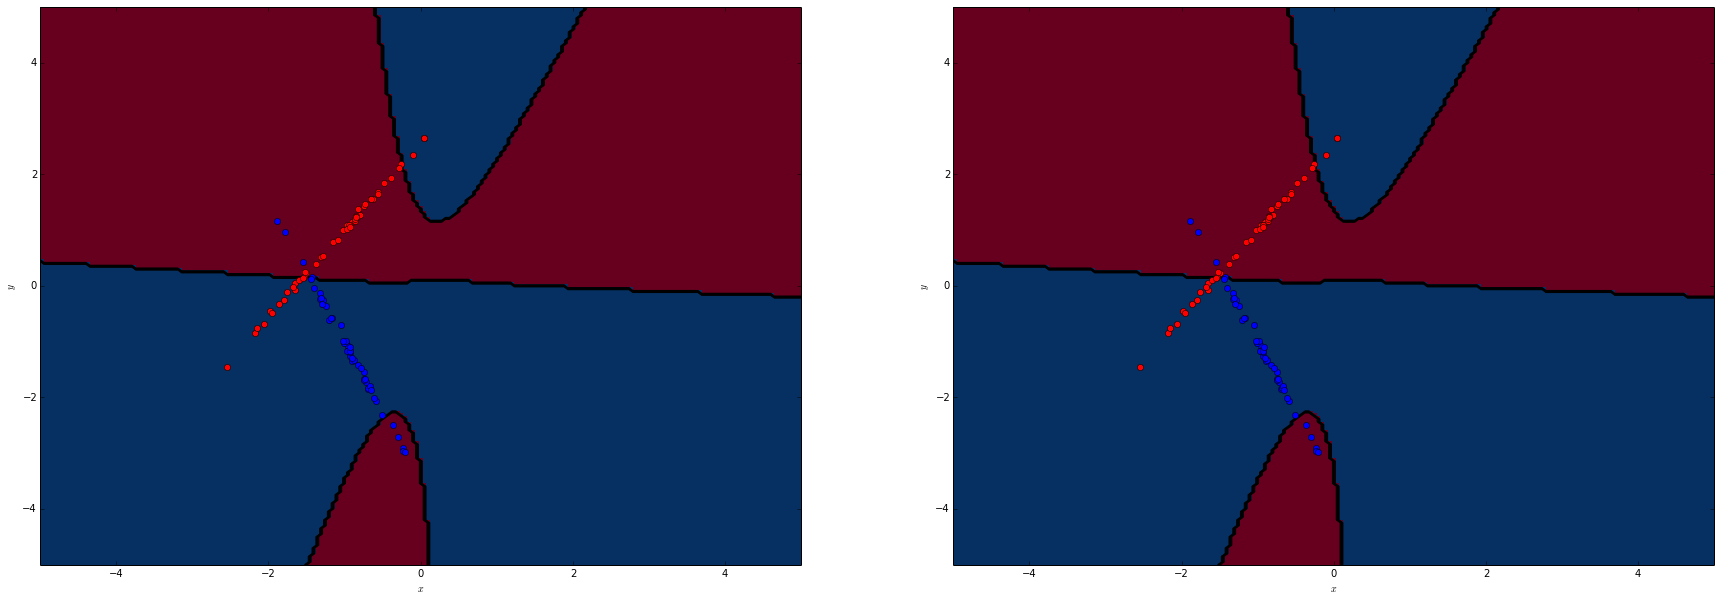

In [20]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_sig_svm1,feats1_train,labels1_train)
plot_binary_data(plt,shogun_feats1_test.get_feature_matrix(),labels1_test)
plt.subplot(122)
plot_model(plt,shogun_sig_svm1,shogun_feats1_train.get_feature_matrix(),labels1_train,fading=False)
plot_binary_data(plt,shogun_feats1_test.get_feature_matrix(),labels1_test)

### Dataset 2

In [21]:
sig_c = 0.5
degree = 4
gamma  = 1
coef = 0

sig_kernel2 = SigmoidKernel(shogun_feats2_train, shogun_feats2_train,len(feats2_train),gamma,coef)
shogun_sig_svm2 = MulticlassLibSVM(sig_c, sig_kernel2, shogun_labels2_train)
shogun_sig_svm2.train()

print np.sum((labels2_test == shogun_sig_svm2.apply(shogun_feats2_test).get_labels()))/500.0

sklearn_sig_svm2 = svm.SVC(C=sig_c, kernel='sigmoid', degree=degree, gamma=gamma, coef0=0.0)
sklearn_sig_svm2.fit(feats2_train,labels2_train)
end = time.time()

print np.sum(labels2_test == sklearn_sig_svm2.predict(feats2_test))/500.0

0.678
0.72


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: [WARN] In file /home/youssef/opensource/shogun/src/shogun/multiclass/MulticlassOneVsOneStrategy.cpp line 34: MulticlassOneVsOneStrategy::CMulticlassOneVsOneStrategy(): register parameters!



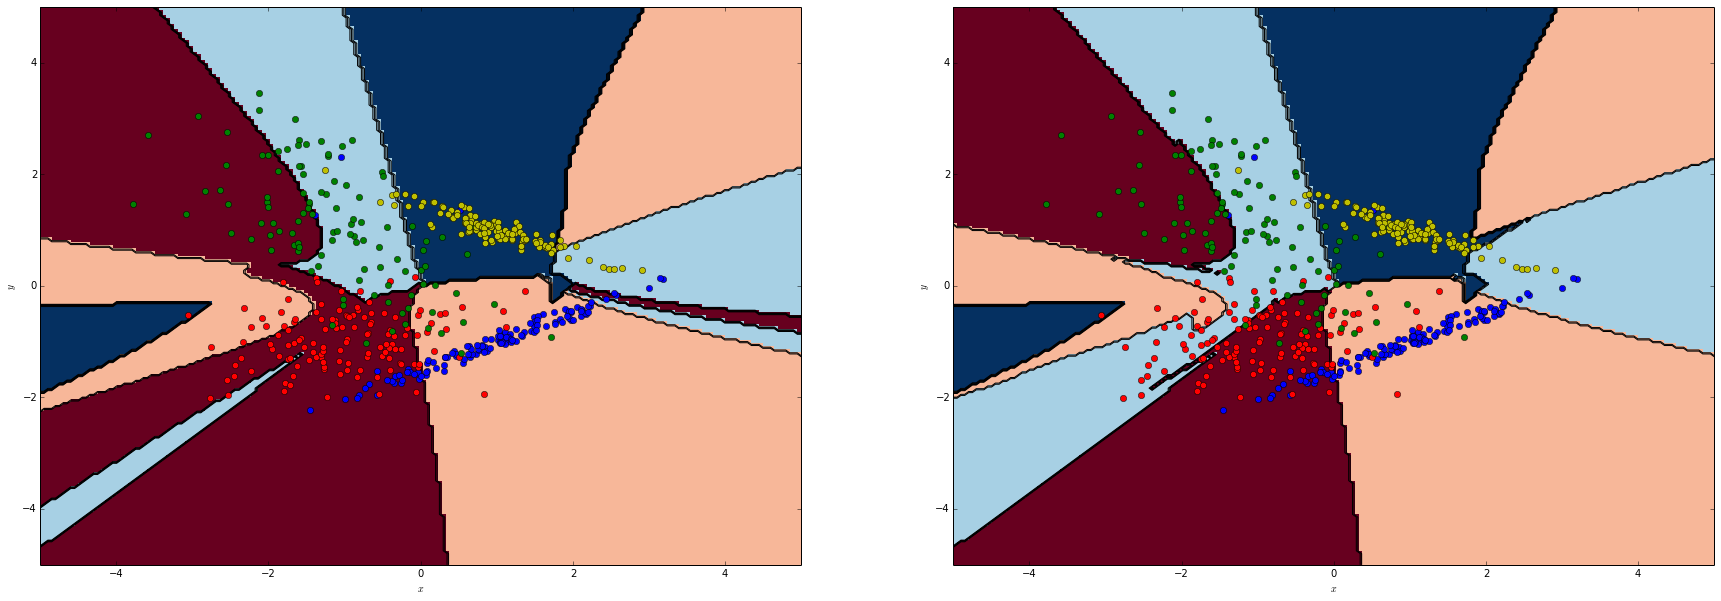

In [22]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_model_sk(plt,sklearn_sig_svm2,feats2_train,labels2_train)
plot_binary_data(plt,shogun_feats2_test.get_feature_matrix(),labels2_test)
plt.subplot(122)
plot_model(plt,shogun_sig_svm2,shogun_feats2_train.get_feature_matrix(),labels2_train,fading=False)
plot_binary_data(plt,shogun_feats2_test.get_feature_matrix(),labels2_test)

### Dataset 3

In [23]:
sig_c = 0.5
degree = 4
gamma  = 1
coef = 0

start = time.time()
sig_kernel3 = SigmoidKernel(shogun_feats3_train, shogun_feats3_train,len(feats3_train),gamma,coef)
shogun_sig_svm3 = MulticlassLibSVM(sig_c, sig_kernel3, shogun_labels3_train)
shogun_sig_svm3.train()
end = time.time()

print np.sum((labels3_test == shogun_sig_svm3.apply(shogun_feats3_test).get_labels()))/1000.0
print end-start

start = time.time()
sklearn_sig_svm3 = svm.SVC(C=sig_c, kernel='sigmoid', degree=degree, gamma=gamma, coef0=0.0)
sklearn_sig_svm3.fit(feats3_train,labels3_train)
end = time.time()

print np.sum(labels3_test == sklearn_sig_svm3.predict(feats3_test))/1000.0
print end-start

0.217
23.6744818687
0.229
15.4685311317


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: [WARN] In file /home/youssef/opensource/shogun/src/shogun/multiclass/MulticlassOneVsOneStrategy.cpp line 34: MulticlassOneVsOneStrategy::CMulticlassOneVsOneStrategy(): register parameters!



### Dataset 4

In [24]:
sig_c = 0.5
degree = 4
gamma  = 1
coef = 0

start = time.time()
sig_kernel4 = SigmoidKernel(shogun_feats4_train, shogun_feats4_train,len(feats4_train),gamma,coef)
shogun_sig_svm4 = MulticlassLibSVM(sig_c, sig_kernel4, shogun_labels4_train)
shogun_sig_svm4.train()
end = time.time()

print np.sum((labels4_test == shogun_sig_svm4.apply(shogun_feats4_test).get_labels()))/1000.0
print end-start

start = time.time()
sklearn_sig_svm4 = svm.SVC(C=sig_c, kernel='sigmoid', degree=degree, gamma=gamma, coef0=0.0)
sklearn_sig_svm4.fit(feats4_train,labels4_train)
end = time.time()

print np.sum(labels4_test == sklearn_sig_svm4.predict(feats4_test))/1000.0
print end-start

0.09
61.2676239014
0.09
60.5459849834


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: [WARN] In file /home/youssef/opensource/shogun/src/shogun/multiclass/MulticlassOneVsOneStrategy.cpp line 34: MulticlassOneVsOneStrategy::CMulticlassOneVsOneStrategy(): register parameters!

